In [8]:
NAME = "Nowrin Sanjana"
ID = "22301268"
SECTION = "16"

# Instructions:

This is your special assessment for CSE330 Lab. ***Please read the instructions carefully!***

1. You must rename this file as "ID_Name_Section_SA.ipynb". Example: "21212121_Niloy Farhan_01-SA.ipynb".
2. There are 4 tasks and each task have several substasks. This tasks are based on the content of lab 5 and lab 6.
3. You must use designated cells for each task. You should not use additional cells for codes of a task.
4. Some task may have no output. It will be mentioned in the designated cells.
5. Not a single line of code of this assessment should be written by AI. If you do, karma will hit you back. ;)
6. **Plagarism can lead to a zero mark in Final Assessment.**
7. If you have any queries, reach out to your lab faculties.


**Best of luck!**

# Task1.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. Plot the function for $$-2.5 \le x \le 1.5$$

b. What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.1$.

c. Use forward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

e. Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

f. Compare the error of each method with actual differentiation at $x = 0 , -1.18625$ by showing in a Pandas Dataframe.

g. plot error vs h curves with proper label and color for each method at $x = 0$ and $h = [0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01]$.


In [9]:
# Import cells. This is done for you!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

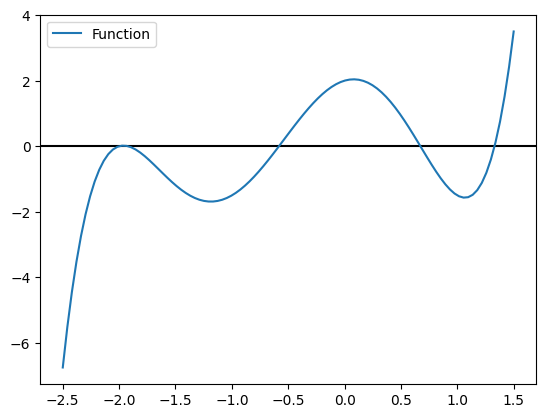

In [32]:
#1.a This cell should plot a graph. You must use polynomial class.
fig, ax = plt.subplots()
ax.axhline(y=0, color = "k")
P = Polynomial([2, 1,-6, -2, 2.5, 1])
data = P.linspace(domain=[-2.5,1.5])
ax.plot(data[0], data[1], label = "Function")
ax.legend()

1.0 - 12.0·x - 6.0·x² + 10.0·x³ + 5.0·x⁴
Slope at x_1 : 0 is 1.0
Slope at x_2 : -1.18625 is -9.340808105218201e-06


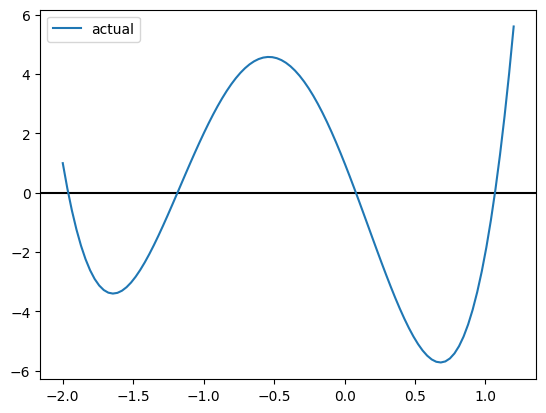

In [11]:
 #1.b This cell should print and plot a graph.
x_1 = 0
x_2 = -1.18625
p_prime = P.deriv(1)
slope_x_1 = p_prime(x_1)
slope_x_2 = p_prime(x_2)
print(p_prime)
print(f"Slope at x_1 : {x_1} is {slope_x_1}")
print(f"Slope at x_2 : {x_2} is {slope_x_2}")

fig, ax = plt.subplots()
ax.axhline(y=0, color = "k")
data1 = p_prime.linspace(domain=[-2,1.2])
ax.plot(data1[0], data1[1], label = "actual")
ax.legend()

In [12]:
#1.c This cell should print
def forward_diff(f, h, x):
    return (f(x+h) - f(x)) / h

h=0.1
x = np.array([0, -1.18625])
for i in x:
    f_d_val = forward_diff(P, h, i)
    print(f"for x_({i}): {f_d_val}")

for x_(0.0): 0.3826000000000018
for x_(-1.18625): 0.5520088838012782


In [13]:
#1.d This cell should print
def backward_diff(f, h, x):
    return (f(x) - f(x-h)) / h

h=0.1
x = np.array([0, -1.18625])
for i in x:
    b_d_val = backward_diff(P, h, i)
    print(f"for x_({i}): {b_d_val}")

for x_(0.0): 1.5776000000000012
for x_(-1.18625): -0.5476397529174859


In [14]:
#1.e This cell should print
def central_diff(f, h, x):
    return (f(x+h) - f(x-h)) / (2*h)

h=0.1
x = np.array([0, -1.18625])
for i in x:
    c_d_val = central_diff(P, h, i)
    print(f"for x_({i}): {c_d_val}")

for x_(0.0): 0.9801000000000015
for x_(-1.18625): 0.002184565441896158


In [15]:
#1.f This cell should show a table
def compare(f, f_prime, h, x):
    Result = {'x' : [], "Actual" : [],"FD": [], "BD" : [], "CD": [], "FD Error" : [], "BD Error": [], "CD Error" : []}     #
    #Write code here
    for i in x:
        Result["x"].append(i)
        Result["Actual"].append(p_prime(i))
        Result["FD"].append(forward_diff(f, h, i))
        Result["BD"].append(backward_diff(f, h, i))
        Result["CD"].append(central_diff(f, h, i))
        Result["FD Error"].append(forward_diff(f, h, i)-p_prime(i))
        Result["BD Error"].append(backward_diff(f, h, i)-p_prime(i))
        Result["CD Error"].append(central_diff(f, h, i)-p_prime(i))
    res = pd.DataFrame(Result)
    return res

comp = compare(P, p_prime, h, x)
comp.head()

,x,Actual,FD,BD,CD,FD Error,BD Error,CD Error
0,0.00000,1.000000,0.382600,1.57760,0.980100,-0.617400,0.57760,-0.019900
1,-1.18625,-0.000009,0.552009,-0.54764,0.002185,0.552018,-0.54763,0.002194


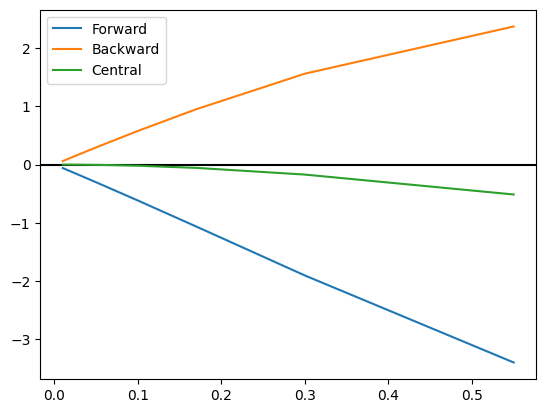

In [16]:
#1g This cell should plot a graph.
def error(f, f_prime, h, x):
    actual_val = f_prime(x)
    fd_error = np.array([])
    bd_error = np.array([])
    cd_error = np.array([])

    for i in h:
        fd_error_i = forward_diff(f, i, x) - actual_val
        fd_error = np.append(fd_error, fd_error_i)

        bd_error_i = backward_diff(f, i, x)-actual_val
        bd_error = np.append(bd_error, bd_error_i)
        cd_error_i = central_diff(f, i, x)-actual_val
        cd_error = np.append(cd_error, cd_error_i)
        pass

    return fd_error, bd_error, cd_error


fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

x_v = 0
h=np.array([0.55,0.3,.17,0.1,0.055,0.03,0.017,0.01])

err = error(P, p_prime, h, x_v)
bx.plot(h, err[0], label='Forward')
bx.plot(h, err[1], label='Backward')
bx.plot(h, err[2], label='Central')
bx.legend()

# Task 2.

a. Propose a better technique for numerical differentiation that provides higher accuracy than the methods you have worked so far. You need to write a function for your proposed technique.

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{2.1}$$

b. Using your proposed method, what is the slope of $f(x)$  at $x=0,−1.18625$ and step size = 0.1?

c. Compare the error of your method with  actual, forward, backward and central differentiation at  $x=0,−1.18625$  by showing in Pandas Dataframe.

d. Plot actual derivative, Forward derivative, Backward derivative, Central derivative and the derivative from your proposed method in a graph. Here, $$h = 0.1, -2 \le x \le 1.2$$

In [17]:
#2a. This cell should not have any output.

Proposed_Method_Name = "Richardson Extrapolation"

#Write Code here
def r_e(f, h, x):
    re = (4*central_diff(f, h/2, x)-central_diff(f, h,x))/3
    return re
h = 0.1
x = np.array([0, -1.18625])

In [18]:
#2b. This cell should print
for i in x:
    re_val = r_e(P, h, i)
    print(f"for x_({i}): {re_val}")

for x_(0.0): 0.9999750000000011
for x_(-1.18625): -3.4340808106048115e-05


In [19]:
#2c.This cell should print
x = np.array([0, -1.18625])
h = 0.1
def compare1(f, f_prime, h, x):
    Result = {'x' : [], "Actual" : [],"FD": [], "BD" : [], "CD": [],"RE": [], "FD Error" : [], "BD Error": [], "CD Error" : [], "RE Error" : []}
    #Write code here
    for i in x:
        Result["x"].append(i)
        Result["Actual"].append(p_prime(i))
        Result["FD"].append(forward_diff(f, h, i))
        Result["BD"].append(backward_diff(f, h, i))
        Result["CD"].append(central_diff(f, h, i))
        Result["RE"].append(r_e(f, h, i))
        Result["FD Error"].append(forward_diff(f, h, i)-p_prime(i))
        Result["BD Error"].append(backward_diff(f, h, i)-p_prime(i))
        Result["CD Error"].append(central_diff(f, h, i)-p_prime(i))
        Result["RE Error"].append(r_e(f, h, i)-p_prime(i))

    res = pd.DataFrame(Result)
    return res

comp1 = compare1(P, p_prime, h, x)
comp1.head()

,x,Actual,FD,BD,CD,RE,FD Error,BD Error,CD Error,RE Error
0,0.00000,1.000000,0.382600,1.57760,0.980100,0.999975,-0.617400,0.57760,-0.019900,-0.000025
1,-1.18625,-0.000009,0.552009,-0.54764,0.002185,-0.000034,0.552018,-0.54763,0.002194,-0.000025


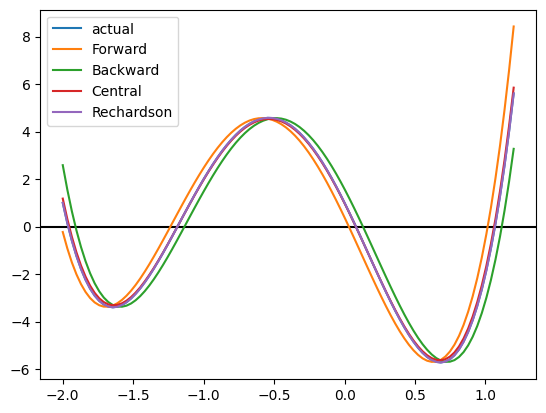

In [20]:
#2.d This cell should plot a graph.
h = 0.1
fig, bx = plt.subplots()
bx.axhline(y=0, color='k')

data2 = p_prime.linspace(domain=[-2, 1.2])
bx.plot(data2[0], data2[1], label='actual')
x = np.linspace(-2, 1.2, 100, endpoint=True)
y = forward_diff(P, h, x)
bx.plot(x, y, label='Forward')
y = backward_diff(P, h, x)
bx.plot(x, y, label='Backward')
y = central_diff(P, h, x)
bx.plot(x, y, label='Central')
y = r_e(P, h, x)
bx.plot(x, y, label='Rechardson')

bx.legend()

# Task 3.

Given,
$f(x) = \frac{-1}{13}x^3 + 2x^2 - 9.5x - 10\tag{3.1}$

a. (i) Write a python function that takes an input function and a list of intervals as a list and returns a dictionary that contains either root exists or not in each intervals.
Determine if root exists in $[(-20,-10),(-10,0), (0,10), (10,20), (20,30)]$.

(ii) Verify your method by ploting the function and the intervals.

In [21]:
#3a_i This cell should print
intervals = [(-20,-10),(-10,0), (0,10), (10,20), (20,30)]  #  This snippet will be given in the question
p1 = Polynomial([-10, -9.5, 2, -1/13])
def root_exists(intervals):
    res = {}
    for i in intervals:
        a, b = i
        f_a = p1(a)
        f_b = p1(b)
        if a<b:
            if f_a*f_b < 0:
                res[i] = "Root exists"
            else:
                res[i] = "Root does not exist"
    return res
rex = root_exists(intervals)
print(rex)

{(-20, -10): 'Root does not exist', (-10, 0): 'Root exists', (0, 10): 'Root exists', (10, 20): 'Root exists', (20, 30): 'Root does not exist'}


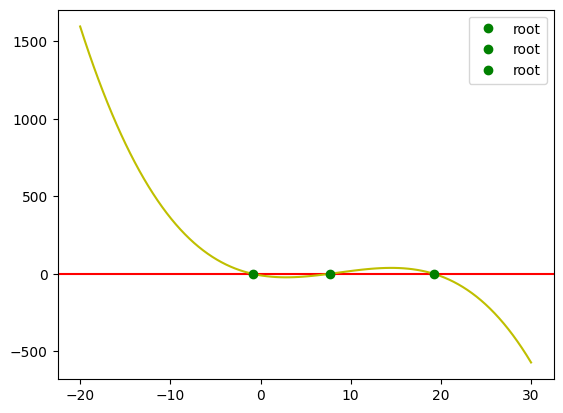

In [22]:
#3a_ii This cell should plot a graph.
# YOUR CODE HERE
xs = np.linspace(-20, 30, 100)
ys = p1(xs)
plt.axhline(y=0, color='r')
plt.plot(xs, ys,'y')
for r in p1.roots():
    plt.plot(r, p1(r),'go', label = 'root')
plt.legend()

b. Using Bisection method, find roots of the function $3.1$ in these intervals $[(−20,−10),(−10,0),(0,10),(10,20),(20,30)]$ where root exists. The value of machine epsilon is, $\epsilon < 10^{-6}$


You can reuse the function of Task 3.a to find out the intervals that contains root.
Note: You should return 3 different roots for the function (3.1).

In [23]:
#3b This cell should print
root1 = []
def bisection_method(intervals):
    for i in intervals:
        a,b = i
        m = (a + b) / 2
        e = 1e-6
        root = 0.0
        list_a = []
        list_b = []
        list_m = []
        list_f = []
        if p1(a)*p1(b)<0:
            while True:
                list_a.append(a)
                list_b.append(b)
                list_m.append(m)
                list_f.append(p1(m))

                if p1(m)==0:
                    root = m
                    root1.append(root)
                    break
                elif p1(a)*p1(m)<0:
                    b=m
                else:
                    a = m
                m_old = m
                m = (a + b) / 2
                if abs((m - m_old)/m) <= e:
                    root = m
                    root1.append(root)
                    break
    return root1
r1 = bisection_method(intervals)
print(r1)

[-0.8829361200332642, 7.658982276916504, 19.223957061767578]


c. Plot the f(x) along with the roots to check if your method is working correctly.

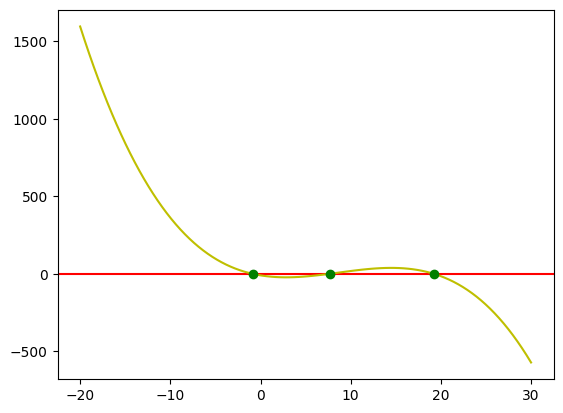

In [24]:
#3c This cell plot a graph.
xs = np.linspace(-20, 30, 100)
ys = p1(xs)
plt.axhline(y=0, color='r')
plt.plot(xs, ys,'y')
for r in r1:
    plt.plot(r, p1(r), 'go')

Task4.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + \frac{x}{2} + 2\tag{4.1}$$

a. Find the actual roots of $f(x)$ and print them.

b. Plot the function for $-2.5 \le x \le 1.5$, also point out the the found roots in the plot

c. The following $g_{1}(x)$ is given which is derived from Eq$(4.1)$, \\
   Use Contraction Mapping Theorem and calculate the value of λ for the given $g(x)$ $$g_{1}(x)= \frac{1}{2}(-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2)\tag{4.2}$$

d. Compute the convergence/divergence table using all the calculated roots for the given $g_{1}(x)$ and prove the whole $g_{1}(x)$ is divergent

Given,

$$g_{2}(x)= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 -2x^3 + \frac{1}{2}x + 2)}\tag{4.3}$$
$$g_{3}(x) = \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - \frac{1}{2}x - 2)}\tag{4.4}$$
e. Derive 2 more separate $g_{4}(x)$ and $g_{5}(x)$ from the given $f(x)$. Implement $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$.

f. Apply Fixed Point Method on the $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$. and find the approprate roots, show 20 iterations for each $g(x)$ for $x_{0}$ = 0.8 and show the convergence table using data from each iteration

g. Plot the $g(x)$s where actual roots were found along with $f(x)$.

In [25]:
#4a This cell should print
p4 = Polynomial([2, 0.5, -6, -2, 2.5, 1])
roots4 = p4.roots()
print(roots4)

[-2.22027583 -1.61803399 -0.65499178  0.61803399  1.37526761]


[-2.22027583 -1.61803399 -0.65499178  0.61803399  1.37526761]


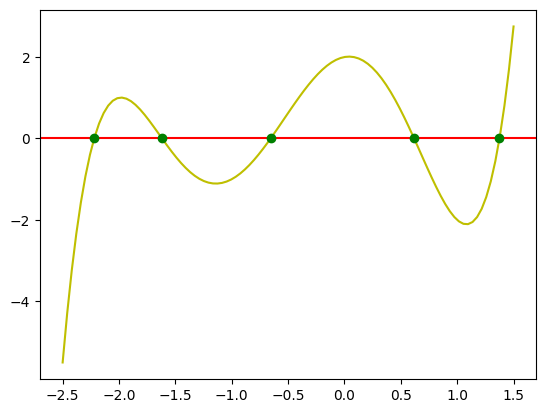

In [26]:
#4b This cell should print plot a graph
x = np.linspace(-2.5, 1.5, 100)
y = p4(x)
dictionary = {
    'x': x,
    'y': y
}
plt.axhline(y=0, color='r')
plt.plot(x, y,'y')
plt.plot(p4.roots(), [0.0]*5, 'go')
print(p4.roots())

In [27]:
#4c This cell should print
g1 = (1/2)*Polynomial([-2, 0, 6, 2, -2.5, -1])#
g1_diff = g1.deriv(1)
print(g1_diff)
lamda_v = abs(g1_diff(p4.roots()))
print(lamda_v)

0.0 + 6.0·x + 3.0·x² - 5.0·x³ - 2.5·x⁴
[4.56014791 2.19098301 1.69803704 3.30901699 8.02306505]


In [28]:
#4d This cell should print
result4 = {'lamda' : [], "conv/div" : []}
for val in lamda_v:
    result4["lamda"].append(val)
    if 0<= abs(val) <= 1:
        result4["conv/div"].append("Convergent")
    elif abs(val) >1:
        result4["conv/div"].append("Divergent")
res = pd.DataFrame(result4)

ans = ""
for v in result4["conv/div"]:
    if v == "Divergent":
        ans="It is proved that, the whole 𝑔1(𝑥) is divergent."
    else:
        ans = "Something is wrong because it should be divergent"
print(ans)
res.head()

It is proved that, the whole 𝑔1(𝑥) is divergent.


,lamda,conv/div
0,4.560148,Divergent
1,2.190983,Divergent
2,1.698037,Divergent
3,3.309017,Divergent
4,8.023065,Divergent


In [29]:
#4e This cell have no outputs
def g2(x):
    p4 = Polynomial([2, 0.5, 0.0, -2, 2.5, 1])
    return np.sqrt(p4(x)/6)

def g3(x):
    p4 = Polynomial([-2, -0.5, 6, 2, 0, -1])
    return np.power(p4(x)/2.5, 1/4)

def g4(x):
    p4 = Polynomial([-2, -0.5, 6, 2, -2.5, 0])
    return np.power(p4(x), 1/5)

def g5(x):
    p4 = (0.5)*Polynomial([2, 0.5, -6, 0, 2.5, 1])
    if p4(x)>=0:
        return np.power(p4(x), 1/3)
    else:
        return -(np.power(-p4(x), 1/3))

In [30]:
#4f This cell should print
a1 = 0.80
g1_a = []

a2 = 0.80
g2_a = []

a3 = 0.80
g3_a = []

a4 = 0.80
g4_a = []

a5 = 0.80
g5_a = []

g1_a.append(a1)
g2_a.append(a2)
g3_a.append(a3)
g4_a.append(a4)
g5_a.append(a5)

# YOUR CODE HERE
for i in range(20):
    x1 = g1(g1_a[i])
    g1_a.append(x1)

    x2 = g2(g2_a[i])
    g2_a.append(x2)

    x3 = g3(g3_a[i])
    g3_a.append(x3)

    x4 = g4(g4_a[i])
    g4_a.append(x4)

    x5 = g5(g5_a[i])
    g5_a.append(x5)
print(pd.DataFrame({'g2(x)':g2_a, 'g3(x)':g3_a, 'g4(x))':g4_a, 'g5(x))':g5_a}))

       g2(x)     g3(x)    g4(x))    g5(x))
0   0.800000  0.800000  0.800000  0.800000
1   0.674250  0.961461  1.075654 -0.353462
2   0.629830  1.126203  1.288144  0.821095
3   0.620179  1.249411  1.362956 -0.396913
4   0.618412  1.320336  1.374225  0.768715
5   0.618100  1.353509  1.375189 -0.214638
6   0.618046  1.367069  1.375262  0.932383
7   0.618036  1.372244  1.375267 -0.427099
8   0.618034  1.374162  1.375268  0.724615
9   0.618034  1.374865  1.375268  0.369525
10  0.618034  1.375121  1.375268  0.891897
11  0.618034  1.375214  1.375268 -0.448620
12  0.618034  1.375248  1.375268  0.687965
13  0.618034  1.375261  1.375268  0.477933
14  0.618034  1.375265  1.375268  0.799954
15  0.618034  1.375267  1.375268 -0.353342
16  0.618034  1.375267  1.375268  0.821225
17  0.618034  1.375267  1.375268 -0.397124
18  0.618034  1.375268  1.375268  0.768430
19  0.618034  1.375268  1.375268 -0.212099
20  0.618034  1.375268  1.375268  0.933829


<ipython-input-29-37c97fdb0344>:8: RuntimeWarning: invalid value encountered in power
  return np.power(p4(x)/2.5, 1/4)
<ipython-input-29-37c97fdb0344>:12: RuntimeWarning: invalid value encountered in power
  return np.power(p4(x), 1/5)


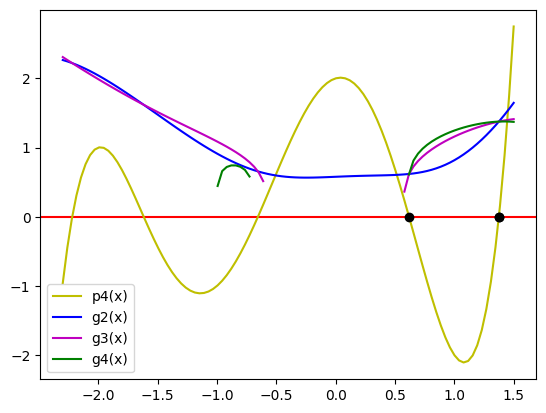

In [31]:
#4g This cell should plot a graph. Do not plot those g(x) which will not converge.
xs = np.linspace(-2.3, 1.5, 100)
ys = p4(xs)
dictionary = {
    'x': xs,
    'y': ys
}
plt.axhline(y=0, color='r')
plt.plot(xs, p4(xs), label='p4(x)', color='y')
plt.plot(xs, g2(xs), label='g2(x)', color ='b')
plt.plot(xs, g3(xs), label='g3(x)', color = 'm' )
plt.plot(xs, g4(xs), label='g4(x)', color = 'g' )
plt.legend()

if len(g2_a) > 0:
    root = np.array([g2_a[len(g2_a)-1], g3_a[len(g3_a)-1], g4_a[len(g4_a)-1]])
    plt.plot(root, p4(root), 'ko')